In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/hasan/Desktop/DATA_SET/police.csv')

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(91741, 15)

In [5]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [6]:
df.isnull()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91737,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91738,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91739,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [7]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [8]:
#dropping the columns which contains all value of null
df.drop('county_name', axis='columns', inplace=True)

In [9]:
df.shape

(91741, 14)

In [10]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [11]:
df.dropna(axis='columns', how='all').shape

(91741, 14)

In [13]:
#Do men of women speed more often?
df[df.violation=='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [14]:
df[df.violation=='Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [15]:
df[df.driver_gender=='M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [16]:
df[df.driver_gender=='F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [17]:
df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [18]:
df.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [19]:
df.groupby('driver_gender').violation.value_counts(normalize=True).loc[:,['Speeding', 'Equipment']]

driver_gender  violation
F              Speeding     0.658500
               Equipment    0.105780
M              Speeding     0.524350
               Equipment    0.135671
Name: violation, dtype: float64

In [20]:
#Does gender affects who get searched during a stop?
# column names are driver_gender search_conducted
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [21]:
df.search_conducted.value_counts().mean()

45870.5

In [22]:
df.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [23]:
df.search_conducted.value_counts(normalize=True).mean()

0.5

In [24]:
df.search_conducted.mean()

0.03483720473942948

In [25]:
df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [26]:
df.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [28]:
#WHY IS search_type column MISSING SO OFTEN?
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [29]:
#Handling missing value
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [30]:
#By default null values are dropped
df.search_type.value_counts().sum()

3196

In [31]:
df.search_type.value_counts(dropna=False).sum()

91741

In [32]:
df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Fris

In [33]:
#printing with null value
df.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Incident t

In [34]:
#search_type have null value where search_conducted == False
df[df.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [35]:
#dropping null value of search_conducted and search_type
df[df.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [36]:
#DURING A SEARCH HOW OFTEN IS THE DRIVER FRISKED?

In [37]:
#Using string methods
df['frisk'] = df.search_type.str.contains('Protective Frisk')

In [38]:
df.frisk.value_counts()

False    2922
True      274
Name: frisk, dtype: int64

In [39]:
df.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [40]:
df.frisk.sum()

274

In [41]:
#8% time is frisk

#mean exclude the missing value by default
df.frisk.mean()

0.08573216520650813

In [42]:
#how mean method generated

274/(274+2922)

0.08573216520650813

In [43]:
#COMBINING DATES AND TIMES

In [44]:
#which year had the least number of stops?
df.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [45]:
#printing stop_date and stop_time in one column
combined = df.stop_date.str.cat(df.stop_time, sep=' ')

In [46]:
df['stop_datetime'] = pd.to_datetime(combined)

In [48]:
#we will sow a new column stop_datetime created
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [50]:
#we can do different type of work usting to_datetime
df.stop_datetime.dt.day
df.stop_datetime.dt.month
df.stop_datetime.dt.year
df.stop_datetime.dt.time
df.stop_datetime.dt.week
df.stop_datetime.dt.weekday

0        6
1        1
2        6
3        6
4        0
        ..
91736    3
91737    3
91738    3
91739    3
91740    3
Name: stop_datetime, Length: 91741, dtype: int64

In [51]:
#counting the year
df.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [52]:
#counting the month
df.stop_datetime.dt.month.value_counts().sort_values()

2     7042
12    7152
9     7427
4     7529
7     7568
8     7615
6     7630
3     7742
10    7745
11    7877
5     7935
1     8479
Name: stop_datetime, dtype: int64

In [53]:
df.stop_datetime.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

In [54]:
df.stop_datetime.dt.year.value_counts().sort_values().index[1]

2010

In [55]:
#How does drug activity change by time of day?
#stop_datetime, drugs_related_stop

In [56]:
df.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [57]:
df.drugs_related_stop.mean()

0.008883705213590434

In [58]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

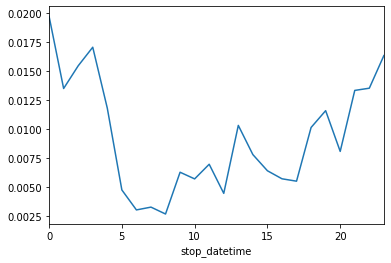

In [59]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

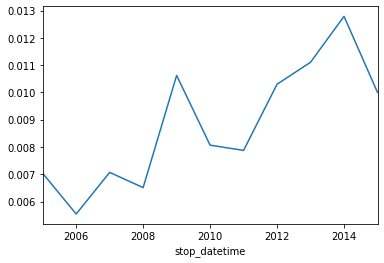

In [60]:
df.groupby(df.stop_datetime.dt.year).drugs_related_stop.mean().plot()

In [61]:
#CREATING USEFUL PLOTS
#Do most stops occur at night
df.stop_datetime.dt.hour

0         1
1         8
2        23
3        17
4        10
         ..
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_datetime, Length: 91741, dtype: int64

In [62]:
df.stop_datetime.dt.hour.value_counts().sort_values()

5      210
4      254
3     1172
21    1499
18    2168
19    2587
17    2900
2     2975
6     3290
20    3340
22    3473
12    3582
16    3844
1     4442
7     4572
15    4832
13    4842
8     5210
0     5221
23    5629
14    5634
11    5877
9     6838
10    7350
Name: stop_datetime, dtype: int64

In [63]:
df.stop_datetime.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

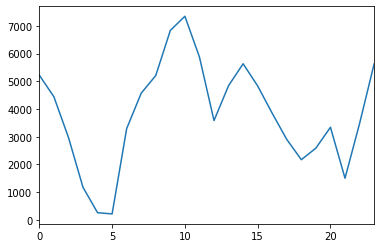

In [64]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()

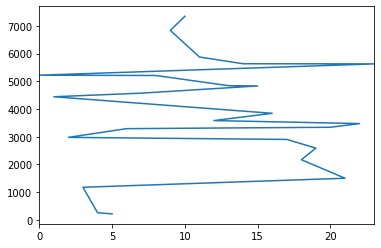

In [65]:
df.stop_datetime.dt.hour.value_counts().plot()

In [67]:
#day time data
df[(df.stop_datetime.dt.hour > 4) & (df.stop_datetime.dt.hour < 22)].shape

(68575, 16)

In [68]:
df.shape

(91741, 16)

In [69]:
df.groupby(df.stop_datetime.dt.hour).count()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
stop_datetime,,,,,,,,,,,,,,,,
0,5221,5221,4853,4857,4840,4853,4853,4853,5221,312,4853,4853,4853,5221,312,5221
1,4442,4442,4021,4021,4012,4021,4021,4021,4442,276,4021,4021,4021,4442,276,4442
2,2975,2975,2718,2718,2715,2718,2718,2718,2975,171,2718,2718,2718,2975,171,2975
3,1172,1172,1071,1072,1068,1071,1071,1071,1172,69,1071,1071,1071,1172,69,1172
4,254,254,216,216,216,216,216,216,254,9,216,216,216,254,9,254
5,210,210,188,188,188,188,188,188,210,4,188,188,188,210,4,210
6,3290,3290,3204,3204,3188,3204,3204,3204,3290,35,3204,3204,3204,3290,35,3290
7,4572,4572,4371,4371,4348,4371,4371,4371,4572,61,4371,4371,4371,4572,61,4572
8,5210,5210,4939,4940,4909,4940,4940,4940,5210,94,4940,4940,4940,5210,94,5210


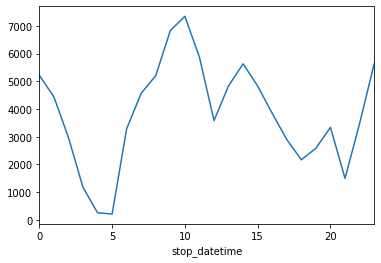

In [70]:
df.groupby(df.stop_datetime.dt.hour).stop_date.count().plot()

In [71]:
#FIXING BAD DATA
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [72]:
df[(df.stop_duration == '1') | (df.stop_duration == '2')].stop_duration ='NaN'

/home/hasan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
df.stop_duration.dtype

dtype('O')

In [74]:
df.loc[(df.stop_duration=='1') & (df.stop_duration=='2'), 'stop_duration']= 'NaN'

In [75]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [76]:
df.loc[(df.stop_duration == 'NaN'), 'stop_duration'] = np.nan

In [77]:
df.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64